In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [6]:
!ls

data  drive  face-mask-dataset.zip  kaggle.json  sample_data


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

Importing required libraries

In [8]:
mask_files=os.listdir('/content/data/with_mask')
without_mask_files=os.listdir('/content/data/without_mask')

In [9]:
print(mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_2394.jpg', 'with_mask_2181.jpg', 'with_mask_3163.jpg', 'with_mask_870.jpg', 'with_mask_3466.jpg']
['without_mask_3808.jpg', 'without_mask_2033.jpg', 'without_mask_3236.jpg', 'without_mask_1767.jpg', 'without_mask_879.jpg']


In [10]:
print("Number of with mask Image",len(mask_files))
print("Number of without mask Images",len(without_mask_files))

Number of with mask Image 3725
Number of without mask Images 3828


The dataset is quite balanced since the proportions of the two classes are very close to each other

In [11]:
mask_labels=[1]*len(mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [12]:
print(mask_labels[0:6])
print(without_mask_labels[0:6])

[1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0]


In [13]:
labels= mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying Images

Text(0.5, 1.0, 'Image without Mask')

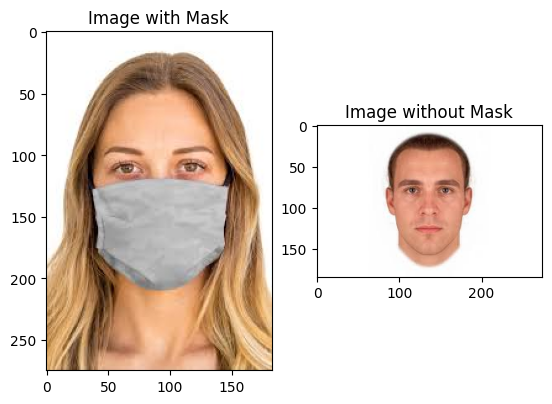

In [14]:
fig, axs=plt.subplots(1,2)  # 1row 2 columns

img=mping.imread('/content/data/with_mask/with_mask_2394.jpg')
axs[0].imshow(img)
axs[0].set_title('Image with Mask')

img1=mping.imread('/content/data/without_mask/without_mask_2033.jpg')
axs[1].imshow(img1)
axs[1].set_title('Image without Mask')


Image Preprocessing

1.Resize the image

2.convert image to numpy array





In [15]:
data=[]

mask_path='/content/data/with_mask/'
for img_file in mask_files:
  image=Image.open(mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
print(len(data))

7553


In [17]:
print(data[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[222 174 112]
  [223 175 113]
  [207 159  98]
  ...
  [236 209 172]
  [250 227 187]
  [253 230 187]]

 [[225 178 118]
  [214 166 106]
  [217 169 110]
  ...
  [231 202 166]
  [227 199 160]
  [225 198 158]]

 [[219 173 115]
  [209 163 105]
  [226 181 124]
  ...
  [206 171 129]
  [222 187 145]
  [228 193 151]]]


In [18]:
print(data[0].shape)

(128, 128, 3)


Preparing features and labels

In [19]:
X=np.array(data)
Y=np.array(labels)

In [20]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [22]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


Scaling

In [24]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

array([[[167, 120,  50],
        [167, 120,  50],
        [166, 119,  49],
        ...,
        [197, 125,  39],
        [196, 126,  45],
        [194, 124,  45]],

       [[167, 120,  48],
        [167, 120,  48],
        [166, 119,  47],
        ...,
        [195, 130,  57],
        [192, 129,  52],
        [187, 127,  48]],

       [[168, 120,  48],
        [168, 120,  48],
        [167, 119,  47],
        ...,
        [207, 145,  91],
        [203, 143,  94],
        [198, 139,  92]],

       ...,

       [[ 48,  40,  32],
        [ 11,   4,   0],
        [  3,   0,   0],
        ...,
        [ 62,  57,  51],
        [ 58,  55,  51],
        [ 65,  62,  58]],

       [[ 48,  44,  40],
        [ 12,   9,   6],
        [  2,   0,   0],
        ...,
        [ 62,  57,  53],
        [ 61,  58,  53],
        [ 65,  61,  57]],

       [[ 18,  19,  19],
        [  3,   3,   3],
        [  2,   2,   1],
        ...,
        [ 61,  56,  53],
        [ 53,  48,  44],
        [ 57,  52,  46]]], dtype=uint8)
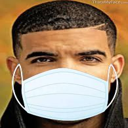

In [25]:
X_train[0]

In [26]:
X_train_scaled[0]

array([[[0.65490196, 0.47058824, 0.19607843],
        [0.65490196, 0.47058824, 0.19607843],
        [0.65098039, 0.46666667, 0.19215686],
        ...,
        [0.77254902, 0.49019608, 0.15294118],
        [0.76862745, 0.49411765, 0.17647059],
        [0.76078431, 0.48627451, 0.17647059]],

       [[0.65490196, 0.47058824, 0.18823529],
        [0.65490196, 0.47058824, 0.18823529],
        [0.65098039, 0.46666667, 0.18431373],
        ...,
        [0.76470588, 0.50980392, 0.22352941],
        [0.75294118, 0.50588235, 0.20392157],
        [0.73333333, 0.49803922, 0.18823529]],

       [[0.65882353, 0.47058824, 0.18823529],
        [0.65882353, 0.47058824, 0.18823529],
        [0.65490196, 0.46666667, 0.18431373],
        ...,
        [0.81176471, 0.56862745, 0.35686275],
        [0.79607843, 0.56078431, 0.36862745],
        [0.77647059, 0.54509804, 0.36078431]],

       ...,

       [[0.18823529, 0.15686275, 0.1254902 ],
        [0.04313725, 0.01568627, 0.        ],
        [0.01176471, 0

Building CNN Model

In [27]:
import tensorflow as tf
from tensorflow import keras

In [31]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2,activation='sigmoid'))



compile model

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training the model

In [1]:
history=model.fit(X_train_scaled,Y_train,epochs=10,validation_split=0.1)

NameError: name 'model' is not defined

In [34]:
y_prob=model.predict(X_test)

48/48 [==============================] - 0s 8ms/step


In [35]:
y_pred=y_prob.argmax(axis=1)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9093315684976837

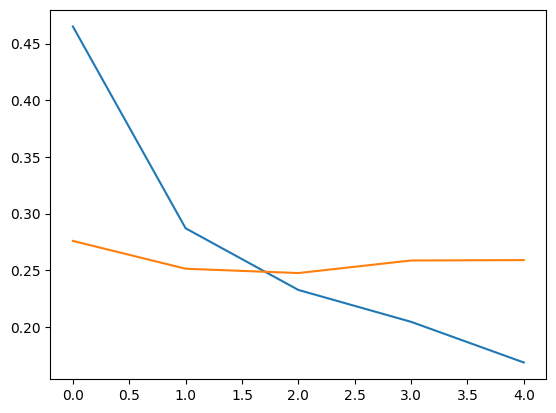

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])